# Pr√°ctico 1: An√°lisis y Visualizaci√≥n

In [1]:
# Importamos las librer√≠as necesarias
import os
import sys
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Seteamos semilla random para reproducibilidad
np.random.seed(0)

### Inicializaci√≥n y carga de datos

Puesto que el dataset se actualiza diariamente, para empezar a trabajar con el es conveniente cargarlo directamente desde Github, para contar siempre con la √∫ltima versi√≥n.

En el mismo tenemos tres subconjuntos de datos.

In [3]:
path = 'C:/Users/lucas/Documents/DIPLODATOS/MENTOR√çA/Datos-Covid19-Argentina/'

In [4]:
file1 = os.path.join(path, 'Argentina-covid19.csv')

data1 = pd.read_csv(file1, error_bad_lines=False)

In [5]:
file2 = os.path.join(path, 'Argentina-covid19-por-provincia.csv')

data2 = pd.read_csv(file2, error_bad_lines=False)

In [6]:
file3 = os.path.join(path, 'Argentina-covid19-fallecidos.csv')

data3 = pd.read_csv(file3, error_bad_lines=False)

### An√°lisis exploratorio

### Dataset 1

In [7]:
# Obtenemos la cantidad de filas y columnas
print("Cantidad de registros: ", data1.shape[0])
print("Cantidad de columnas: ", data1.shape[1])

Cantidad de registros:  115
Cantidad de columnas:  29


In [8]:
# Listamos las columnas y sus tipos de datos
data1.dtypes

fecha                       object
dia_cuarentena             float64
casos_nuevos                 int64
casos_total                  int64
%mujer                      object
%varon                      object
mujer_total                float64
varon_total                float64
franja_etaria               object
edad_prom                  float64
importados_total             int64
importados_nuevos            int64
local_total                  int64
local_nuevos                 int64
comunitario_total            int64
comunitario_nuevos         float64
en_investigacion_total       int64
en_investigacion_nuevos      int64
muertes_total                int64
muertes_nuevos               int64
alta_total                 float64
alta_nuevos                float64
alta_definitiva            float64
descartados_total          float64
descartados_nuevos         float64
tests_realizados_total     float64
tests_realizados_nuevos    float64
test_por_millon_hab         object
observaciones       

In [9]:
# Cambiamos el tipo de la columna 'fecha' de object a datetime
data1['fecha'] = pd.to_datetime(data1['fecha'], format='%Y-%m-%d')

In [10]:
# Analizamos 2 muestras de filas, usamos transpose() para visualizar los datos con mayor comodidad
data1.sample(2).transpose()

10                   74
fecha                    2020-03-15 00:00:00  2020-05-18 00:00:00
dia_cuarentena                           NaN                   59
casos_nuevos                              11                  303
casos_total                               56                 8371
%mujer                                   NaN                 49,1
%varon                                   NaN                 50,9
mujer_total                              NaN                 4110
varon_total                              NaN                 4261
franja_etaria                            NaN                20-59
edad_prom                                NaN                   39
importados_total                          48                  939
importados_nuevos                          8                    0
local_total                                8                 3718
local_nuevos                               3                  157
comunitario_total                          0                 2607
comunitario_nuevos                       NaN                  139
en_investigacion_total                     0                 1107
en_investigacion_nuevos                    0                    7
muertes_total                              2                  382
muertes_nuevos                             0                    9
alta_total                               NaN                 2872
alta_nuevos                              NaN                  247
alta_definitiva                          NaN                  NaN
descartados_total                        NaN                82123
descartados_nuevos                       NaN                 2021
tests_realizados_total                   NaN               108634
tests_realizados_nuevos                  NaN                 2805
test_por_millon_hab                      NaN                 2394
observaciones                            NaN                  NaN

In [11]:
# TO DO
# ¬øEn qu√© d√≠a se dio hasta ahora el record de contagios? ¬øY de muertes?

In [12]:
max_contagios_1 = data1.loc[data1['casos_nuevos'].idxmax()].fecha
print('D√≠a con m√°s contagios: ' + str(max_contagios_1.date()))
max_muertes_2 = data1.loc[data1['muertes_nuevos'].idxmax()].fecha
print('D√≠a con m√°s muertes: ' + str(max_muertes_2.date()))

D√≠a con m√°s contagios: 2020-06-26
D√≠a con m√°s muertes: 2020-06-24


In [13]:
# TO DO
# Hacer una exploraci√≥n similar de los otros dos conjuntos de datos

### Dataset 2

In [14]:
# Obtenemos la cantidad de filas y columnas
print("Cantidad de registros: ", data2.shape[0])
print("Cantidad de columnas: ", data2.shape[1])

Cantidad de registros:  2258
Cantidad de columnas:  7


In [15]:
data2.dtypes

fecha              object
provincia          object
casos_total         int64
casos_nuevos        int64
muertes_total     float64
muertes_nuevos    float64
observaciones      object
dtype: object

In [16]:
# Cambiamos el tipo de la columna 'fecha' de object a datetime
data2['fecha'] = pd.to_datetime(data2['fecha'], format='%Y-%m-%d')

In [17]:
# Analizamos 2 muestras de filas, usamos transpose() para visualizar los datos con mayor comodidad
data2.sample(2).transpose()

1222                 1188
fecha           2020-05-12 00:00:00  2020-05-11 00:00:00
provincia                     Salta                Chaco
casos_total                       5                  476
casos_nuevos                      1                   17
muertes_total                     0                   20
muertes_nuevos                    0                    1
observaciones                   NaN                  NaN

In [18]:
max_contagios_2 = data2.loc[data2['casos_nuevos'].idxmax()].fecha
print('D√≠a con m√°s contagios: ' + str(max_contagios_2.date()))
max_muertes_2 = data2.loc[data2['muertes_nuevos'].idxmax()].fecha
print('D√≠a con m√°s muertes: ' + str(max_muertes_2.date()))

D√≠a con m√°s contagios: 2020-06-26
D√≠a con m√°s muertes: 2020-06-17


### Dataset 3

In [19]:
# Obtenemos la cantidad de filas y columnas
print("Cantidad de registros: ", data3.shape[0])
print("Cantidad de columnas: ", data3.shape[1])

Cantidad de registros:  1212
Cantidad de columnas:  9


In [20]:
data3.dtypes

fecha              object
provincia          object
num_caso            int64
genero             object
edad              float64
tipo_caso          object
comorbilidades     object
viajes             object
observaciones      object
dtype: object

In [21]:
# Cambiamos el tipo de la columna 'fecha' de object a datetime
data3['fecha'] = pd.to_datetime(data3['fecha'], format='%Y-%m-%d')

In [22]:
# Analizamos 2 muestras de filas, usamos transpose() para visualizar los datos con mayor comodidad
data3.sample(2).transpose()

1003                 776 
fecha           2020-06-21 00:00:00  2020-06-12 00:00:00
provincia                 R√≠o Negro                 CABA
num_caso                       1004                  777
genero                       hombre                mujer
edad                             56                   63
tipo_caso                       NaN                  NaN
comorbilidades                  NaN                  NaN
viajes                          NaN                  NaN
observaciones                   NaN                  NaN

#### Tareas a realizar:

*   An√°lisis estad√≠stico de variables

> Seleccionar un conjunto de al menos **cuatro** variables que les resulten de inter√©s y:
1.   Usar distintos tipos de gr√°ficos para describir sus distribuciones
2.   Analizar Outliers (si los hubiera)
3.   Calcular estad√≠sticos cl√°sicos (media, mediana, moda, desviaci√≥n estandar)

* Evoluci√≥n de variables en el tiempo

> Seleccionar al menos **tres** variables y graficar como fueron cambiando desde el primer d√≠a hasta hoy.

*   An√°lisis de probabilidades condicionales e independencia entre dos variables.

> Con al menos **un** par de variables realizar un an√°lisis de este tipo.

>  Algunas ideas gu√≠a:
1.   ¬øCu√°l es la probabilidad de que un infectado sea mujer (var√≥n)?
2.   ¬øCu√°l es la probabilidad de que un infectado sea de C√≥rdoba (u otra provincia)?
3.   Probabilidad de que un fallecido sea mujer (var√≥n)
4.   Probabilidad de que un fallecido sea mujer (var√≥n) dado que est√° en la franja etaria 60-80 (u alguna otra).
5.   Probabilidad de que un fallecido en la franja etaria 60-80 sea mujer (var√≥n).
6.   Probabilidad de que un fallecido sea de CABA dado que es mujer. Y viceversa, que sea mujer dado que es de CABA.
7.   Probabilidad de que un fallecido en la franja etaria 30-60 sea de Chaco. (Quiz√°s encontremos alguna correlaci√≥n interesante entre edad y provincia).
8.   ¬øEl g√©nero de un fallecido es independiente de la franja etaria?
9.   ¬øEl g√©nero de un fallecido es independiente de la provincia?
10.  ¬øLa franja etaria de un fallecido es independiente de la provincia?

### An√°lisis estad√≠stico de variables

#### 1.   Usar distintos tipos de gr√°ficos para describir sus distribuciones

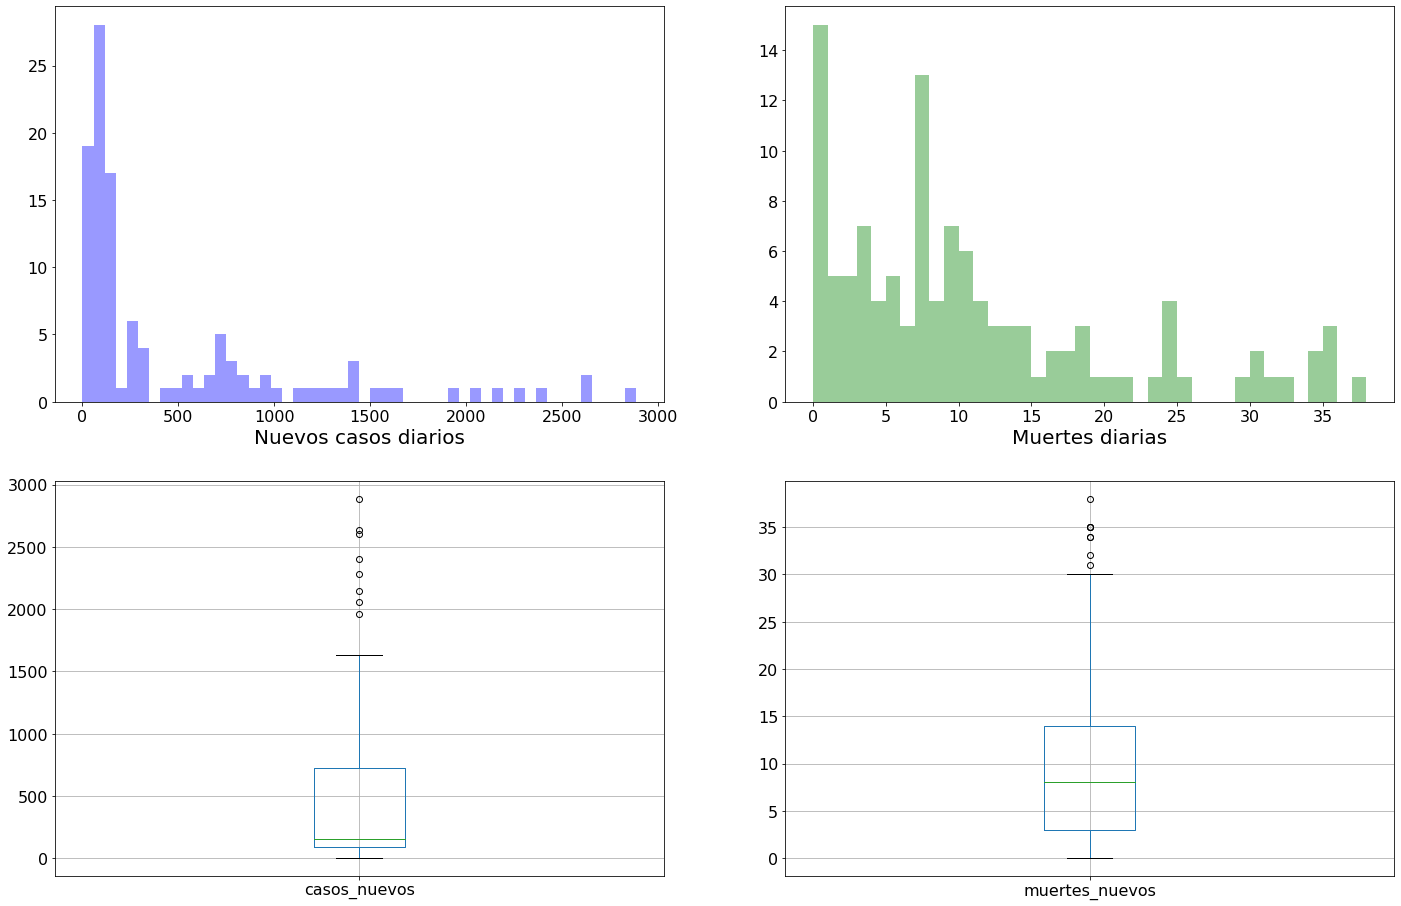

In [23]:
fig, axs = plt.subplots(2,2, figsize=(24, 16))  # para plotear un gr√°fico al lado del otro

sns.distplot(data1['casos_nuevos'],kde=False, bins=50, label='Nuevos casos diarios', color='blue', ax=axs[0,0])
sns.distplot(data1['muertes_nuevos'],kde=False, bins=38, label='Muertes diarias', color='green', ax=axs[0,1])

for ax in axs[0]:
    ax.title.set_fontsize(20)
    ax.tick_params(axis="x", labelsize=16)
    ax.tick_params(axis="y", labelsize=16)
axs[0,0].set_xlabel('Nuevos casos diarios', fontsize = 20)
axs[0,1].set_xlabel('Muertes diarias', fontsize = 20)

data1.boxplot(column='casos_nuevos', ax=axs[1,0])
data1.boxplot(column='muertes_nuevos', ax=axs[1,1])

for ax in axs[1]:
    ax.title.set_fontsize(20)
    ax.tick_params(axis="x", labelsize=16)
    ax.tick_params(axis="y", labelsize=16)

In [24]:
muertes_mujeres = data3[data3['genero']=='mujer']
muertes_varones = data3[data3['genero']=='hombre']

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 0, 'Edad')

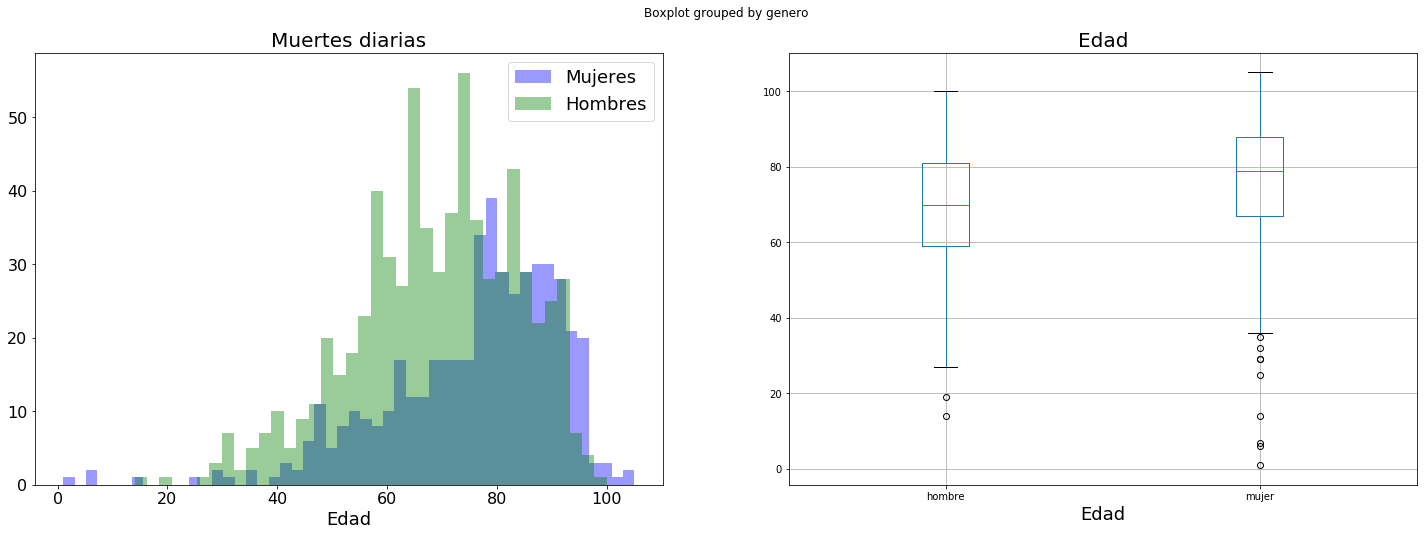

In [25]:
fig, axs = plt.subplots(ncols=2, figsize=(24, 8))  # para plotear un gr√°fico al lado del otro


sns.distplot(muertes_mujeres['edad'],kde=False, bins=50, label='Mujeres', color='blue', ax=axs[0])
sns.distplot(muertes_varones['edad'],kde=False, bins=38, label='Hombres', color='green', ax=axs[0])

axs[0].tick_params(axis="x", labelsize=16)
axs[0].tick_params(axis="y", labelsize=16)
axs[0].set_xlabel('Edad', fontsize = 18)
axs[0].legend(fontsize=18)
axs[0].set_title('Muertes diarias',fontsize=20)

data3.boxplot(column='edad',by='genero', rot=0, ax=axs[1]);

axs[1].set_title('Edad',fontsize=20)
axs[1].set_xlabel('Edad', fontsize = 18)

#### 2.   Analizar Outliers (si los hubiera)

In [26]:
outliers_casos_nuevos = data1[ data1.casos_nuevos > data1.casos_nuevos.mean() + 3*data1.casos_nuevos.std() ]
outliers_muertes_nuevos = data1[ data1.muertes_nuevos > data1.muertes_nuevos.mean() + 3*data1.muertes_nuevos.std() ]
outliers_muertes_mujeres =  muertes_mujeres[ muertes_mujeres.edad < muertes_mujeres.edad.mean() - 3*muertes_mujeres.edad.std() ]
outliers_muertes_varones = muertes_varones[ muertes_varones.edad < muertes_varones.edad.mean() - 3*muertes_varones.edad.std() ]

In [27]:
outliers_casos_nuevos

fecha  dia_cuarentena  casos_nuevos  casos_total %mujer %varon  \
111 2020-06-24            96.0          2635        49851   49,4   50,6   
112 2020-06-25            97.0          2606        52457   49,4   50,6   
113 2020-06-26            98.0          2886        55343   49,4   50,6   

     mujer_total  varon_total franja_etaria  edad_prom  ...  muertes_nuevos  \
111      24626.0      25225.0         20-59       36.0  ...              38   
112      25914.0      26543.0         20-59       36.0  ...              34   
113      27339.0      28004.0         20-59       36.0  ...              34   

     alta_total  alta_nuevos  alta_definitiva  descartados_total  \
111     14788.0          NaN              NaN           208232.0   
112     18416.0          NaN              NaN           213175.0   
113     19143.0          NaN              NaN           218640.0   

     descartados_nuevos  tests_realizados_total  tests_realizados_nuevos  \
111                 NaN                309601.0                   9258.0   
112                 NaN                318721.0                   9120.0   
113                 NaN                329036.0                  10315.0   

     test_por_millon_hab                                      observaciones  
111                 6822                                                NaN  
112                 7023                                                NaN  
113                 7251  Reporte vespertino 20-06-26 no fue publicado e...  

[3 rows x 29 columns]

In [28]:
outliers_muertes_nuevos

Empty DataFrame
Columns: [fecha, dia_cuarentena, casos_nuevos, casos_total, %mujer, %varon, mujer_total, varon_total, franja_etaria, edad_prom, importados_total, importados_nuevos, local_total, local_nuevos, comunitario_total, comunitario_nuevos, en_investigacion_total, en_investigacion_nuevos, muertes_total, muertes_nuevos, alta_total, alta_nuevos, alta_definitiva, descartados_total, descartados_nuevos, tests_realizados_total, tests_realizados_nuevos, test_por_millon_hab, observaciones]
Index: []

[0 rows x 29 columns]

In [29]:
outliers_muertes_mujeres

fecha     provincia  num_caso genero  edad tipo_caso  \
549  2020-06-01         Chaco       550  mujer  14.0       NaN   
727  2020-06-10  Buenos Aires       728  mujer   7.0       NaN   
901  2020-06-17  Buenos Aires       902  mujer  25.0       NaN   
1096 2020-06-24  Buenos Aires      1097  mujer   1.0       NaN   
1100 2020-06-24  Buenos Aires      1101  mujer   6.0       NaN   

                                         comorbilidades viajes observaciones  
549                               Enfermedad autoinmune    NaN           NaN  
727                                   Fibrosis qu√≠stica    NaN           NaN  
901                                                 NaN    NaN           NaN  
1096  Enfermedad neurol√≥gica y EPOC con Ox√≠geno depe...    NaN           NaN  
1100                              Enfermedad oncol√≥gica    NaN           NaN

In [30]:
outliers_muertes_varones

fecha     provincia  num_caso  genero  edad tipo_caso comorbilidades  \
405 2020-05-21  Buenos Aires       406  hombre  19.0       NaN            NaN   
788 2020-06-13  Buenos Aires       789  hombre  14.0       NaN            NaN   

    viajes observaciones  
405    NaN           NaN  
788    NaN           NaN

#### 3. Calcular estad√≠sticos cl√°sicos (media, mediana, moda, desviaci√≥n estandar)

In [31]:
from scipy import stats

In [32]:
datos = []

datos.append({
    'Variable' : 'casos nuevos diarios',
    'media' : np.nanmean(data1['casos_nuevos']),
    'SD' : np.nanstd(data1['casos_nuevos']),
    'mediana' : np.nanmedian(data1['casos_nuevos']),
    'moda' : stats.mode(data1['casos_nuevos'])[0][0], 
    'outliers' : len(outliers_casos_nuevos),
})

datos.append({
    'Variable' : 'muertes diarias',
    'media' : np.nanmean(data1['muertes_nuevos']),
    'SD' : np.nanstd(data1['muertes_nuevos']),
    'mediana' : np.nanmedian(data1['muertes_nuevos']),
    'moda' : stats.mode(data1['muertes_nuevos'])[0][0], 
    'outliers' : len(outliers_muertes_nuevos),
})

datos.append({
    'Variable' : 'edad de muerte de mujeres',
    'media' : np.nanmean(muertes_mujeres['edad']),
    'SD' : np.nanstd(muertes_mujeres['edad']),
    'mediana' : np.nanmedian(muertes_mujeres['edad']),
    'moda' : stats.mode(muertes_mujeres['edad'])[0][0],
    'outliers' :len(outliers_muertes_mujeres)
})

datos.append({
    'Variable' : 'edad de muerte de hombes',
    'media' : np.nanmean(muertes_varones['edad']),
    'SD' : np.nanstd(muertes_varones['edad']),
    'mediana' : np.nanmedian(muertes_varones['edad']),
    'moda' : stats.mode(muertes_varones['edad'])[0][0],
    'outliers' :len(outliers_muertes_varones)
})

datos = pd.DataFrame(datos)
datos

Variable       media          SD  mediana  moda  outliers
0       casos nuevos diarios  502.182609  664.904133    158.0  88.0         3
1            muertes diarias   10.469565    9.715359      8.0   0.0         0
2  edad de muerte de mujeres   75.776181   15.881272     79.0  88.0         5
3   edad de muerte de hombes   68.907010   15.054073     70.0  68.0         2

### Evoluci√≥n de variables en el tiempo

In [33]:
def time_plot(x, y, title, ylabel, y2=None, label1='', label2='', filename=None):

    fig, ax = plt.subplots(figsize=(10, 5))

    if y2 is not None:
        ax.plot(x, y, '-o', label=label1)
        ax.plot(x, y2, '-s', label=label2)
    else:
        ax.plot(x, y, '-o')
        
    ax.set_title(title, fontsize=20)
    ax.set_xlabel('D√≠a', fontsize=15)
    ax.set_ylabel(ylabel, fontsize=15)

    ax.set_xticks(x[::4])
    ax.set_xticklabels(x[::4])

    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
    plt.legend(loc='best')
    plt.grid()

    plt.tight_layout()
    
    if filename is not None: 
        plt.savefig(filename)
    
    plt.show()

In [34]:
fechas = (data1['fecha'].dt.day).astype(str) +'/'+ (data1['fecha'].dt.month).astype(str)

- ##### Variable: muertes_nuevos

In [35]:
casos_nuevos = data1['casos_nuevos']

No handles with labels found to put in legend.


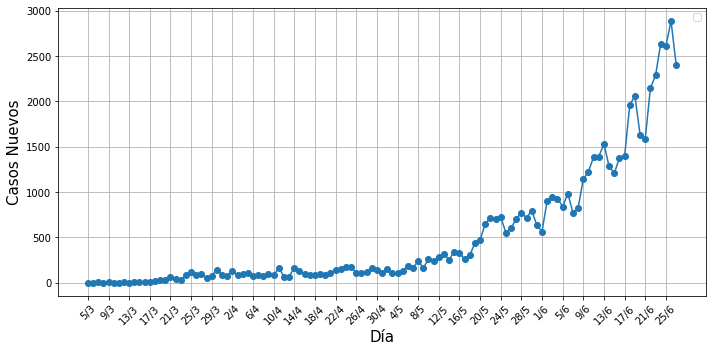

In [36]:
time_plot(fechas, casos_nuevos, title='', ylabel='Casos Nuevos')

- #### Variable: casos_total

In [37]:
casos_total = data1['casos_total']

No handles with labels found to put in legend.


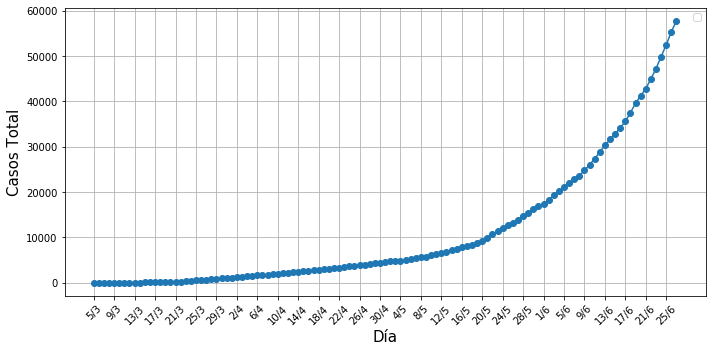

In [38]:
time_plot(fechas, casos_total, title='', ylabel='Casos Total')

- ##### Variable: muertes_nuevos

In [39]:
muertes_nuevos = data1['muertes_nuevos']

No handles with labels found to put in legend.


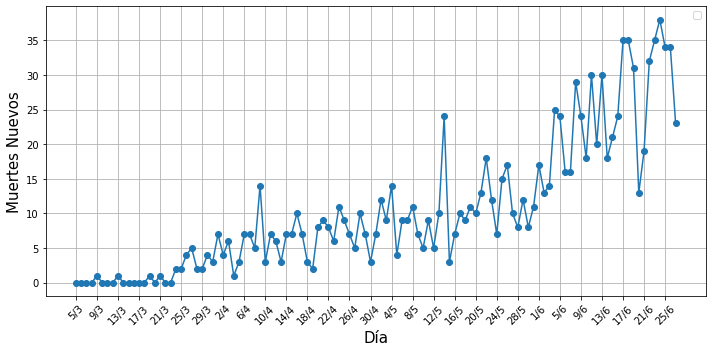

In [40]:
time_plot(fechas, muertes_nuevos, title='', ylabel='Muertes Nuevos')

- ##### Variable: muertes_total

In [41]:
muertes_total = data1['muertes_total']

No handles with labels found to put in legend.


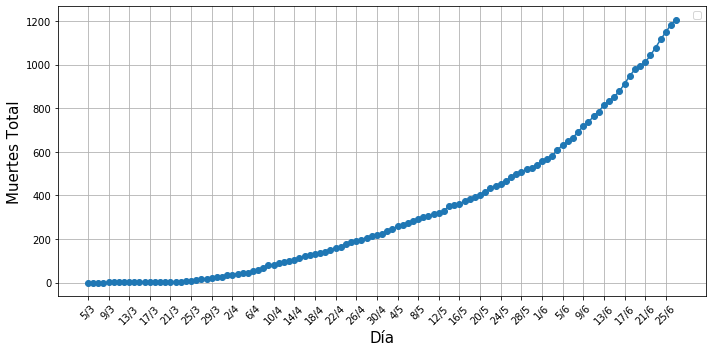

In [42]:
time_plot(fechas, muertes_total, title='', ylabel='Muertes Total')

 ### An√°lisis de probabilidades condicionales e independencia entre dos variables.

1.   ¬øCu√°l es la probabilidad de que un infectado sea mujer (var√≥n)?

In [43]:
prob_mujer = int(data1.iloc[-1]['mujer_total']) / int(data1.iloc[-1]['casos_total'])
porc_mujer = data1.iloc[-1]['%mujer']
print('Probabilidad de que un infectado sea mujer: ' + str(round(prob_mujer, 3)) + ' .Porcentaje de mujeres infectadas: ' + str(porc_mujer) + '%')

prob_varon = int(data1.iloc[-1]['varon_total']) / int(data1.iloc[-1]['casos_total'])
porc_varon = data1.iloc[-1]['%varon']
print('Probabilidad de que un infectado sea var√≥n: ' + str(round(prob_varon, 3)) + ' .Porcentaje de varones infectados: ' + str(porc_varon) + '%')

Probabilidad de que un infectado sea mujer: 0.494 .Porcentaje de mujeres infectadas: 49,4%
Probabilidad de que un infectado sea var√≥n: 0.506 .Porcentaje de varones infectados: 50,6%


2.   ¬øCu√°l es la probabilidad de que un infectado sea de C√≥rdoba (u otra provincia)?

In [44]:
def prob_provincia(nombre_provincia):
    casos_provincia = data2[data2.provincia == nombre_provincia].iloc[-1].casos_total
    casos_totales = data1.iloc[-1].casos_total
    return casos_provincia / casos_totales

In [45]:
provincias = sorted(data2.provincia.unique())
for provincia in provincias:
    prob = prob_provincia(provincia)
    print('Probabilidad de que un infectado sea de ' + provincia + ': '+ str(round(prob, 3)))

Probabilidad de que un infectado sea de Buenos Aires: 0.481
Probabilidad de que un infectado sea de CABA: 0.425
Probabilidad de que un infectado sea de Chaco: 0.033
Probabilidad de que un infectado sea de Chubut: 0.002
Probabilidad de que un infectado sea de Corrientes: 0.002
Probabilidad de que un infectado sea de C√≥rdoba: 0.011
Probabilidad de que un infectado sea de Entre R√≠os: 0.004
Probabilidad de que un infectado sea de Formosa: 0.001
Probabilidad de que un infectado sea de Jujuy: 0.001
Probabilidad de que un infectado sea de La Pampa: 0.0
Probabilidad de que un infectado sea de La Rioja: 0.001
Probabilidad de que un infectado sea de Mendoza: 0.003
Probabilidad de que un infectado sea de Misiones: 0.001
Probabilidad de que un infectado sea de Neuqu√©n: 0.007
Probabilidad de que un infectado sea de R√≠o Negro: 0.014
Probabilidad de que un infectado sea de Salta: 0.0
Probabilidad de que un infectado sea de San Juan: 0.0
Probabilidad de que un infectado sea de San Luis: 0.0
Probab

3.   Probabilidad de que un fallecido sea mujer (var√≥n)

In [46]:
mujeres  = len(data3[data3['genero']=='mujer'])
varones  = len(data3[data3['genero']=='hombre'])
total    = len(data3)

if ( total != mujeres + varones ):
    #print('Error en la suma', data3['genero'].isna().sum())
    #print('\n\n')
    if ( total == data3['genero'].isna().sum() + mujeres + varones ):
        total = mujeres + varones

print( 'Probabilidades de que un fallecido sea mujer u hombre: \n' )
print( 'P(mujer)  = ', float(mujeres)/float(total) )
print( 'P(hombre) = ', float(varones)/float(total) )

Probabilidades de que un fallecido sea mujer u hombre: 

P(mujer)  =  0.41008403361344536
P(hombre) =  0.5899159663865546


4.   Probabilidad de que un fallecido sea mujer (var√≥n) dado que est√° en la franja etaria 60-80 (u alguna otra).

In [47]:
df = data3[ data3['edad'] >= 60 ]
df = df[ df['edad'] <= 80 ]
mujeres_60_80  = len(df[df['genero']=='mujer'])
varones_60_80  = len(df[df['genero']=='hombre'])
total_60_80    = mujeres_60_80 + varones_60_80

print( '*Probabilidades de que un fallecido sea mujer u hombre, dado que se encontraban en \n la franja etaria entre 60 y 80 a√±os: \n' )
print( 'P(mujer | 60<edad<80)  = ', round(float(mujeres_60_80)/float(total_60_80), 3))
print( 'P(hombre | 60<edad<80) = ', round(float(varones_60_80)/float(total_60_80), 3 ))

print( '\n' )
print( '*Probabilidades de que un fallecido sea mujer u hombre, y que se encontraban en \n la franja etaria entre 60 y 80 a√±os: \n' )
print( 'P(60<edad<80) = ', round(float(total_60_80)/float(total), 3), '\n' )
print( 'P(mujer,60<edad<80)  = ', round(float(mujeres_60_80)/float(total), 3))
print( 'P(hombre,60<edad<80) = ', round(float(varones_60_80)/float(total), 3 ))

*Probabilidades de que un fallecido sea mujer u hombre, dado que se encontraban en 
 la franja etaria entre 60 y 80 a√±os: 

P(mujer | 60<edad<80)  =  0.358
P(hombre | 60<edad<80) =  0.642


*Probabilidades de que un fallecido sea mujer u hombre, y que se encontraban en 
 la franja etaria entre 60 y 80 a√±os: 

P(60<edad<80) =  0.451 

P(mujer,60<edad<80)  =  0.161
P(hombre,60<edad<80) =  0.29


5. Probabilidad de que un fallecido en la franja etaria 60-80 sea mujer (var√≥n).

In [48]:
# Probabilidad de que sea mujer de entre 60 y 80 a√±os
prob_fallec_mujer_60_80 = len(data3[(data3.genero == 'mujer') & ((data3.edad >= 60) & (data3.edad <= 80))]) / len(data3[(data3.edad >= 60) & (data3.edad <= 80)])
print("Probabilidad de que sea mujer de entre 60 y 80 a√±os: " + str(round(prob_fallec_mujer_60_80, 3)))

Probabilidad de que sea mujer de entre 60 y 80 a√±os: 0.358


In [49]:
# Probabilidad de que sea hombre de entre 60 y 80 a√±os
prob_fallec_hombre_60_80 = len(data3[(data3.genero == 'hombre') & ((data3.edad >= 60) & (data3.edad <= 80))]) / len(data3[(data3.edad >= 60) & (data3.edad <= 80)])
print("Probabilidad de que sea hombre de entre 60 y 80 a√±os: " + str(round(prob_fallec_hombre_60_80, 3)))

Probabilidad de que sea hombre de entre 60 y 80 a√±os: 0.642


6.   Probabilidad de que un fallecido sea de CABA dado que es mujer. Y viceversa, que sea mujer dado que es de CABA.

In [50]:
# Probabilidad de que sea de CABA dado que es mujer
prob_fallec_CABA_mujer = len(data3[(data3.provincia == 'CABA') & (data3.genero == 'mujer')]) / len(data3[data3.genero == 'mujer'])
print("Probabilidad de que sea de CABA dado que es mujer: " + str(round(prob_fallec_CABA_mujer, 3)))

Probabilidad de que sea de CABA dado que es mujer: 0.402


In [51]:
# Probabilidad de que sea mujer dado que es de CABA
prob_fallec_mujer_CABA = len(data3[(data3.genero == 'mujer') & (data3.provincia == 'CABA')]) / len(data3[data3.provincia == 'CABA'])
print("Probabilidad de que sea mujer dado que es de CABA: " + str(round(prob_fallec_mujer_CABA, 3)))

Probabilidad de que sea mujer dado que es de CABA: 0.431


7.   Probabilidad de que un fallecido en la franja etaria 30-60 sea de Chaco. (Quiz√°s encontremos alguna correlaci√≥n interesante entre edad y provincia).

In [52]:
# Probabilidad de que sea de Chaco y tenga entre 30 y 60 a√±os
prob_CHACO_30_60 = len(data3[(data3.provincia == 'Chaco') & ((data3.edad >= 30) & (data3.edad <= 60))]) / len(data3[(data3.edad >= 30) & (data3.edad <= 60)])
print("Probabilidad de que sea de Chaco y tenga entre 30 y 60 a√±os: " + str(round(prob_CHACO_30_60, 3)))

Probabilidad de que sea de Chaco y tenga entre 30 y 60 a√±os: 0.14


In [53]:
# Probabilidad de que tenga entre 30 y 60 a√±os dado que es de Chaco
prob_30_60_CHACO = len(data3[((data3.edad >= 30) & (data3.edad <= 60)) & (data3.provincia == 'Chaco')]) / len(data3[(data3.provincia == 'Chaco')])
print("Probabilidad de que tenga entre 30 y 60 a√±os dado que es de Chaco: " + str(round(prob_30_60_CHACO, 3)))

Probabilidad de que tenga entre 30 y 60 a√±os dado que es de Chaco: 0.4


8.   ¬øEl g√©nero de un fallecido es independiente de la franja etaria?

En este caso para verificar la independencia, comprobamos si cumple el siguiente criterio: $P(A|B) = P(A)$.

En nuestro caso P(A|B) es igual a prob_fallec_mujer_60_80 (Probabilidad de que la fallecida sea mujer de entre 60 y 80 a√±os) y P(A) es la probabilidad de que sea mujer 

In [54]:
prob_fallec_mujer_60_80 == prob_mujer

False

In [55]:
prob_fallec_hombre_60_80 == prob_varon

False

Comprobamos que no son independientes ya que no se cumple el criterio definido. Realizamos el mismo an√°lisis para los varones y determinamos que tampoco se cumple el criterio. Podemos afirmar que el g√©nero de un fallecido no es independiente de la franja etaria.

9.   ¬øEl g√©nero de un fallecido es independiente de la provincia?

En este caso para verificar la independencia, comprobamos si cumple el siguiente criterio: $P(A\cap B) = P(A)*P(B)$.

D√≥nde  ùëÉ(ùê¥‚à©ùêµ) es PROB_CHACO_MUJER (Probabilidad de que sea del Chaco dado que es del Mujer), y P(A) es probabilidad que sea del Chaco y P(B) probabilidad que sea mujer.

In [56]:
PROB_CHACO = len(data3[(data3.provincia == 'Chaco')]) / len(data3)

In [57]:
PROB_CHACO_MUJER = len(data3[((data3.provincia == 'Chaco') & (data3.genero == 'mujer'))]) / len(data3[(data3.genero == 'mujer')])

In [63]:
PROB_CHACO_MUJER == PROB_CHACO * prob_mujer

False

Comprobamos que no son independientes ya que no se cumple el criterio definido.

10.  ¬øLa franja etaria de un fallecido es independiente de la provincia?

En este caso para verificar la independencia, comprobamos si cumple el siguiente criterio: $P(A\cap B) = P(A)*P(B)$.

D√≥nde  ùëÉ(ùê¥‚à©ùêµ) es prob_CHACO_30_60 (Probabilidad de que sea de Chaco y tenga entre 30 y 60 a√±os), y P(A) es probabilidad que sea del Chaco y P(B) probabilidad que tenga entre 30 y 60 a√±os.

In [59]:
prob_30_60 = len(data3[((data3.edad >= 30) & (data3.edad <= 60))]) / len(data3)

In [62]:
prob_CHACO_30_60 ==  PROB_CHACO * prob_30_60

False

Comprobamos que no son independientes ya que no se cumple el criterio definido.